<a href="https://colab.research.google.com/github/hank199599/data_science_from_scratch_reading_log/blob/main/Chapter8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

進行這專案前，需要引用第四章的向量定義以及相關運算來進行初始化

In [1]:
from typing import List
import math

Vector = List[float]

def subtrate( v:Vector, w:Vector) -> Vector:
  assert len(v) == len(w) #兩個向量必須有相同的維度

  return [ v_i-w_i for v_i,w_i in zip(v,w)]

def dot(v:Vector,w:Vector)->float:
  #計算v_1*w_1+... +v_n*w_n
  assert len(v)==len(w),"兩個向量必須有相同的維度"

  return sum(v_i*w_i for v_i,w_i in zip(v,w))

def sum_of_squares(v:Vector) -> float:
  return dot(v,v)

def squared_distance(v:Vector,w:Vector) -> float:
  return sum_of_squares(subtrate(v,w))

def distance(v:Vector,w:Vector) -> float:
  return math.sqrt(squared_distance(v,w))

def add( v:Vector, w:Vector) -> Vector:
  assert len(v) == len(w) ,"兩個向量必須有相同的維度"

  return [ v_i+w_i for v_i,w_i in zip(v,w)]

def scalar_multiply(c:float,v:Vector) -> Vector:
  return [c*v_i for v_i in v]

def vector_mean(vectors:List[Vector])->Vector:
  n=len(vectors)
  return scalar_multiply(1/n,vector_sum(vectors))

def vector_sum(vectors:List[Vector]) -> Vector:
  #先檢查vertors這個向量列表是否為空
  assert vectors,"列表中沒有向量!"

  #檢查vertors 向量列表內的所有向量都具有相同的維度
  num_elements=len(vectors[0])
  assert all(len(v)==num_elements for v in vectors),"向量維度不一致"

  #所有vectors[i]相加起來，是結果的第i個元素值
  return [sum(vector[i] for vector in vectors) for i in range(num_elements)]

# 梯度遞減(gradient descent)
用於找出某個輸入值v，使函數得出的最大值(或最小值)的可能值

In [2]:
def sum_of_square(v:Vector)->float:
  """計算v之中的平方和"""
  return dot(v,v)

## 梯度(*gradient*)：向量的偏導數
  
欲求出函數的**最大值**：
1. 取個隨機的起始點
2. 計算其梯度
3. 沿著梯度方向(即函數增長最多的方向)移動一小步

欲求出函數的**最小值**： 
1. 取個隨機的起始點
2. 計算其梯度
3. 沿著梯度**反方向**移動一小步

### 圖8-1  利用梯度遞減的概念，來找出最小值
![pic 8-1](https://lh3.googleusercontent.com/25UnUOO0nEydtbTOO2oImdEs9gcZCRAV605Rcyj3sq7R1sJvhiAbrXCU4NOAmk7e2Fy13nqZr_sUtttgzGKjWukxsSyTtjXdPcERR-fQNODiKqjJJEzJkyDhweAINiXpE5DSI9u9pOIsctPLXFkum9tWDjil3td9ZuhrXAtQUzjXI6urrOARRVK0RTcve7QzKqKrkXUVESGc09MEX5aZ-WQzbClFJUInfZcyAF6p5AZd6RXw2f5-PfQ5d_LVAA97lukdnup3ZmvR5NaSBbBsoe40F8vPe3RdukmBAd-QfhluROmTQ38S5CKazKeINvzg91naEWsiKo_0AVuyS9PZVLg2kLEf7qGmyH5bo0vi__kwA3Jgu4MNw50PGJjOFWkVVVB9MVWbiUmMXoOebxLPkgFnIWRprkvMkj1dMc1HjB3A2TBT5fFS-3A3MzPOJ4DoVY8B939t5zkUAbBSpA83h8oFeepa2jwKahH-GavgLsmuq_U8OB0-n9TlfEMSgxFbJS01uyQ5_epjH12olp7prDN9vowxAHyW62GqdTK5HJDVQEa2ZdYK26pooJFUibhwf88ub7qsn-z3mrM1y4qro-087Drt97_AcctWW7uccCoEePXB3fpzKgIfkxztD4MGnsDaYfucJOTKD3I5UK3o7L8rMCIlMPuT_mxsi6Au618iDwYmEZMv7IszQ8LdUQ=w762-h559-no?authuser=0)
  
如果函數只有一個局域最小值，則我們能輕易找到這個值，但如果函數有好幾個極小值,就有可能找錯點。  
如果函數根本沒有最小值，則會陷入無限迴圈。

# 梯度的估算

如果f函數只有一個變數  
在點X所謂的導數(derivative)就是衡量x出現微小變化時f(x)跟著變化的程度。

導數可以定義為商差(difference quotient)的極限：  
其中h趨近於0

In [3]:
from typing import Callable

def difference_quotient(f:Callable[[float],float],x:float,h:float)->float:
  return (f(x+h)-f(x))/h

### 圖8-2 利用商差的定義來趨近導數的定義
導數就是(x,f(x))這個點的切線斜率，  
而商差則是穿越(x,f(x))和(x+h,f(x+h))這兩點的割線斜率。  
隨著h趨近於0，割線與切線會越來越近。
  
![pic 8-2](https://lh3.googleusercontent.com/rbCDonyegkqDkirKhNAsGChU0Gd4LjZKC8BkG1intRmjxE0SPr0OG_25WBOS7hfW5vWvgIVkFN7VoYZN4jifGkobb7ycEhyPzSrXWjv1eGEZroC8c5PM5tMB_YO-7z7t2VnIymYTKClJAzSsLfe7hpgmIXVNSNIWi7YARrr34BiMQYrOBQzE5xUM-ZaN-sm9D5zOsiSSAsXvXO6JMknT6jlPrvUK-9LmbTFH6b5zMSv9hwpFbF-fE18Hyr6-Y9XqTa09ZVkzbrwkd_31VQLhovJZAA5uOcGJHnSfG_66HWXPhWQBXKcbBb143uCANyzIscyR5eAYBtoORlnlWchL3p0FeQ2QWebutOMQ0_VaOh1xbIjbfV7Mx17EeFQRGNv0gYhRwMM7RZRlsfSJbq_MVhTiLr0uASpqOq7Kk2ponK0MBvBVPK93Gh3hUcgu-CQj8toy3Xo9qBfqedxLzPy_0Yl0ZfHkA7dLXqUJNvdJU0T2q1s1lmcSP66t-bTid3GZtnSVqNi7jO3N3TPgW74AA1zepO5SbIo-6uzz7lK1_nk9StqWg2j1z0ovIezAQVieVGjB9TBOMct-RiCN31oLp5I0dIvN6KUQA0IxwUan9s0xuKmcc7ZmioHJQqfw3PYNqsAc1fmUz7a-dJ-iDp67b4AZa-ADVWXQgVD6ic1ymwjo-mcl08f3iMNPLGcIWQ=w971-h708-no?authuser=0)

## 範例：平方函數

In [4]:
#平方函數
def square(x:float)->float:
  return x*x

In [5]:
#平方函數的導數
def devivative(x:float)->float:
  return 2*x

### 圖8-3 利用商差獲取導數的結果

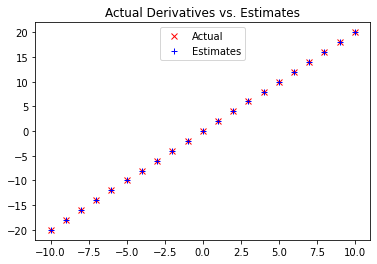

In [6]:
xs = range(-10,11)
actuals =[devivative(x) for x in xs]
estimates = [difference_quotient(square,x,h=0.001) for x in xs]

#畫出圖形來比較兩者
import matplotlib.pyplot as plt
plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals ,'rx',label='Actual')    #用紅色x表示
plt.plot(xs, estimates ,'b+',label='Estimates') #用藍色+表示
plt.legend(loc=9)
plt.show()

## 偏導數
如果f是個多變數函數，就會有多個偏導數

In [7]:
def partitial_difference_quotient(f:Callable[[float],float],v:Vector,i:int,h:float) ->float:
  """送回f在v中第i個元素所對應的差商"""
  w = [v_j + (h if i else 0) for i in range(len(v))]
  return (f(w)-f(v))/ h

### 利用商差估計梯度
缺點是對於計算能力要求很高，  
若v有n個元素，則會進行2n個運算

In [8]:
def estimate_gradient(f:Callable[[float],float],v:Vector,h:float = 0.0001):
  return [partial_difference_quotient(f,v,i,h) for i in range(len(v))]

# 梯度的應用

透過梯度遞減，在眾多三維向量中試著求出最小值。  
1. 以隨機方式挑出一個起始點
2. 沿著梯度的反方向移動一小步
3. 重複動作1.2.直到梯度變得非常小為止

In [9]:
import random

def gradient_step(v:Vector,gradient:Vector,step_size:float) -> Vector:
  """從v沿著gradient的方向移動step_size的距離"""
  assert len(v) == len(gradient)
  step = scalar_multiply(step_size,gradient)
  return add(v,step)

def sum_of_squares_gradient(v:Vector) -> Vector:
  return [2*v_i for v_i in v]

#取個隨機起點
v = [random.uniform(-10,10) for i in range(3)]

for epoch in range(1000):
  grad = sum_of_squares_gradient(v) # 計算出v所對應的梯度
  v = gradient_step(v,grad,-0.01)  # 往梯度的負方向跨一小步
  print(epoch,v)

assert distance(v,[0,0,0]) < 0.001  # v應該會很接近0



0 [-7.090337690182397, 6.998913405603898, -9.649301313557366]
1 [-6.9485309363787495, 6.85893513749182, -9.45631528728622]
2 [-6.809560317651174, 6.721756434741984, -9.267188981540496]
3 [-6.67336911129815, 6.587321306047144, -9.081845201909687]
4 [-6.539901729072187, 6.455574879926202, -8.900208297871494]
5 [-6.409103694490743, 6.3264633823276775, -8.722204131914063]
6 [-6.280921620600928, 6.199934114681124, -8.547760049275782]
7 [-6.15530318818891, 6.075935432387501, -8.376804848290266]
8 [-6.032197124425132, 5.954416723739751, -8.20926875132446]
9 [-5.911553181936629, 5.835328389264956, -8.04508337629797]
10 [-5.793322118297897, 5.7186218214796565, -7.884181708772011]
11 [-5.677455675931939, 5.604249385050063, -7.72649807459657]
12 [-5.5639065624133, 5.492164397349062, -7.571968113104639]
13 [-5.452628431165034, 5.38232110940208, -7.4205287508425455]
14 [-5.343575862541734, 5.274674687214039, -7.272118175825694]
15 [-5.236704345290899, 5.169181193469758, -7.1266758123091805]
16 [-5.

隨著執行的階段越多，v就越靠近[0,0,0]

## 選擇正確的跨步間隔
* 使用固定的間隔
* 隨時間逐漸縮小間隔
* 每個步驟都重新能夠讓目標函數數值最小話的間隔

# 利用梯度遞減的做法來套入模型
運用梯度遞減的做法把參數化模型套入到資料中，這些模型通常具有一個或多個參數。這些可微分的參數負責維繫著模型與資料間的關係。並搭配一個**損失函數(loss function)**來衡量模型與資料的匹配程度。

In [10]:
inputs = [(x,20*x+5) for x in range(-50,50)]

In [11]:
def linear_gradient(x:float,y:float,theta:Vector) ->Vector:
  slope,intercept = theta
  predicted = slope * x + intercept # 模型的預測值
  error = (predicted - y)       # 誤差為(預測值-實際值)
  squared_error = error**2       # 我們要設法最小化平方誤差
  grad = [2*error*x,2*error]      # 過程中會用到梯度值
  return grad

針對整個資料集，查看軍方差的值。  
而均方差的梯度值，其實就是各個梯度值的平均值。  
  
1. 首先從一組隨機的theta值開始
2. 計算出梯度的隨機值
3. 沿著梯度方向調整theta參數值
4. 重複步驟2、3的動作。

經過很多階段(epoch)之後，就能慢慢地學習得出正確的參數值：

In [ ]:
#首先用一組隨機值，最為斜率與截距的起始值
theta = [random.uniform(-1,1),random.uniform(-1,1)]

learning_rate = 0.001

for epoch in range(5000):
  #計算梯度的平均值
  grad = vector_mean([linear_gradient(x,y,theta) for x,y in inputs])
  #延梯度方向移動一步
  theta = gradient_step(theta,grad,-learning_rate)
  print(epoch,theta)

slope,intercept = theta

print("斜率：",slope)
print("截距：",intercept)

# 小批量梯度遞減 (minibatch gradient descent)
自較大的資料集取出小批量資料，再根據小批量資料計算相應的梯度值。(然後再沿著這個梯度方向更新參數值)

In [16]:
from typing import TypeVar , List , Iterator

T = TypeVar('T') #用他建立「各種型別皆可使用的」函式

def minibatches(dataset:List[T],
         batch_size:int,
         shuffle:bool=True)->Iterator[List[T]]:
  """自資料集中取出大小為batch_sixe的小批量資料"""
  #起始索引值分別為0、batch_size、2*batch_size
  batch_starts = [start for start in range(0,len(dataset),batch_size)]
  if shuffle:random.shuffle(batch_starts) #打亂批量資料順序

  for start in batch_starts:
    end = start + batch_size
    yield dataset[start:end]

TypeVar(T)能被用來建立一個「各種型別皆可使用的」函式，輸入跟輸出都必須是相同的型別

In [ ]:
theta = [random.uniform(-1,1),random.uniform(-1,1)]

for epoch in range(1000):
  for batch in minibatches(inputs,batch_size=20):
    grad = vector_mean([linear_gradient(x,y,theta) for x,y in batch])
    theta = gradient_step(theta,grad,-learning_rate)
  print(epoch,theta)

slope,intercept = theta

print("斜率：",slope)
print("截距：",intercept)

## 隨機梯度遞減(stochastic gradient descent)
一次只使用一個訓練樣本，以計算相應的梯度並沿該方向更新參數值。

In [18]:
theta = [random.uniform(-1,1),random.uniform(-1,1)]

for epoch in range(1000):
  for x,y in inputs:
    grad = linear_gradient(x,y,theta)
    theta = gradient_step(theta,grad,-learning_rate)
  print(epoch,theta)

slope,intercept = theta

print("斜率：",slope)
print("截距：",intercept)

0 [20.120474962772256, -0.9962981504470255]
1 [20.115305506382622, -0.7390343837172242]
2 [20.11035847115921, -0.4928082128322836]
3 [20.10562368632877, -0.25714607095130837]
4 [20.101092017621323, -0.03159472190018599]
5 [20.096754786384956, 0.18427962516768878]
6 [20.092603641259934, 0.39089215035237573]
7 [20.08863060731502, 0.5886402209294586]
8 [20.084828008990595, 0.7779041551489965]
9 [20.081188569602492, 0.9590479542110666]
10 [20.077705279244842, 1.1324200027709823]
11 [20.07437142729673, 1.2983537380957821]
12 [20.071180623352742, 1.4571682919262197]
13 [20.068126700489177, 1.609169103845906]
14 [20.065203801260846, 1.7546485086999886]
15 [20.062406312898556, 1.89388629951031]
16 [20.059728847646795, 2.0271502651810542]
17 [20.057166242799884, 2.154696705006657]
18 [20.05471361474959, 2.276770922793324]
19 [20.052366195895367, 2.3936076976684095]
20 [20.050119498100035, 2.505431735448908]
21 [20.047969169243952, 2.6124581010956365]
22 [20.045911108016103, 2.714892632580915]
2